In [1]:
# Load packages
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import scipy as scp
import scipy.stats as scps
import pickle
import matplotlib.pyplot as plt
from datetime import datetime
import time
import scipy.optimize as scp_opt

# Load my own functions
#import dnnregressor_train_eval_keras as dnnk
#from kde_training_utilities import kde_load_data
#import make_data_wfpt as mdw

In [3]:
import samplers.diagnostics as diag_

In [4]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [4]:
pd.__version__

'0.25.3'

In [10]:
x = [0, 1, 2]

In [11]:
x_tiled = np.tile(x, (10, 1))

In [13]:
x_tiled.shape

(10, 3)

In [3]:
x = np.linspace(1, 100)

In [7]:
from scipy.stats import mode
a, b = mode(x)

In [9]:
b

array([1])

In [52]:
np.arange(0, 150, 1)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [ ]:
inputs = Input(shape = (7,))
x = Dense(20, activation = 'relu')(inputs)
x = Dense(40, activation = 'relu')(x)
x = Dense(60, activation = 'relu')(x)
x = Dense(80, activation = 'relu')(x)
x = Dense(100, activation = 'relu')(x)
x = Dense(120, activation = 'relu')(x)
predictions = Dense(1, activation = 'linear')(x)
model = Model(inputs = inputs, outputs = predictions)
model.compile(optimizer = 'nadam',
              loss = 'mse',
              metrics = ['mse'])

In [ ]:
data = np.random.uniform(low = -1, high = 1, size = ((100000000, 7)))
labels = np.matmul(data, np.array([1, 2, 3, 4, 5, 6, 7]))
labels = labels + np.random.normal(loc = 0, scale = 0.1, size = 100000000)
#labesl = np.random.uniform(low = -1, high = 1, size = ((100000000, 1)))

In [ ]:
data_test = np.random.uniform(low = -1, high = 1, size = ((10000000, 7)))
labels_test = np.matmul(data_test, np.array([1, 2, 3, 4, 5, 6, 7]))
labels_test = labels_test + np.random.normal(loc = 0, scale = 0.1, size = 10000000)

In [ ]:
out = model.fit(data[:,:7],
                  labels,
                  epochs = 20,
                  validation_data = ((data_test, labels_test)),
                  batch_size = 200000)

In [ ]:
from scipy.stats import gamma
from scipy.stats import weibull

In [ ]:
gamma.(1, a = 1, scale = 0.1)

In [ ]:
weibull.pdf(a = 1, scale = 0.1)

In [ ]:
np.power(3, 1/3)

In [ ]:
(0) ** (1/3)

In [ ]:
a = ['a', 'b', 'c'] + ['d', 'e']

In [ ]:
dir_ = '/home/afengler/git_repos/nn_likelihoods/data_storage/kde/weibull/train_test_data/'
files_ = os.listdir(dir_)
files_.sort()
test_label_files = []
train_label_files = []
test_features_files = []
train_features_files = []

for file_ in files_:
    if file_[:6] == 'test_l':
        test_label_files.append(file_)
    if file_[:6] == 'test_f':
        test_features_files.append(file_)
    if file_[:7] == 'train_l':
        train_label_files.append(file_)
    if file_[:7] == 'train_f':
        train_features_files.append(file_)

In [ ]:
test_label_files.pop(0)
test_features_files.pop(0)
train_label_files.pop(0)
train_features_files.pop(0)

In [ ]:
test_label_files
train_label_files

In [ ]:
data = pd.concat([pd.read_pickle(dir_ + file_) for file_ in test_label_files])
data.reset_index(drop = True, inplace = True)
data.to_pickle('/home/afengler/git_repos/nn_likelihoods/data_storage/kde/weibull/train_test_data/test_labels.pickle',
              protocol = 4)

In [ ]:
data = pd.concat([pd.read_pickle(dir_ + file_) for file_ in test_features_files])
data.reset_index(drop = True, inplace = True)
data.to_pickle('/home/afengler/git_repos/nn_likelihoods/data_storage/kde/weibull/train_test_data/test_features.pickle',
              protocol = 4)

In [ ]:
data = pd.concat([pd.read_pickle(dir_ + file_) for file_ in train_features_files])
data.reset_index(drop = True, inplace = True)
data.to_pickle('/home/afengler/git_repos/nn_likelihoods/data_storage/kde/weibull/train_test_data/train_features.pickle',
              protocol = 4)

In [ ]:
data = pd.concat([pd.read_pickle(dir_ + file_) for file_ in train_label_files])
data.reset_index(drop = True, inplace = True)
data.to_pickle('/home/afengler/git_repos/nn_likelihoods/data_storage/kde/weibull/train_test_data/train_labels.pickle',
              protocol = 4)

In [ ]:
data.to_pickle('/home/afengler/git_repos/nn_likelihoods/data_storage/kde/weibull/train_test_data/train_labels.pickle',
              protocol = 4)

In [ ]:
train_features, train_labels, test_features, test_labels = kde_load_data(folder = '/home/afengler/git_repos/nn_likelihoods/data_storage/kde/weibull/train_test_data/')

In [ ]:
train_features.shape

In [ ]:
train_labels.shape

In [ ]:
test_features.shape

In [ ]:
test_labels.shape

In [ ]:
test_file = train_features.values

In [ ]:
test_file.shape

In [ ]:
177986205 + 19768803

In [ ]:
#np.random.normal(size = (10, 10))
t = pd.DataFrame(np.random.normal(size = (10, 10)))

In [ ]:
t.reset_index(drop = True, inplace = True)

In [ ]:
np.random.shuffle(t.values)

In [ ]:
t

In [2]:
import kde_training_utilities as kde_utils

In [3]:
kde_utils.kde_make_train_test_split(folder = '/home/afengler/git_repos/nn_likelihoods/data_storage/kde/linear_collapse/train_test_data/')

writing test labels to file
writing test features to file
writing train labels to file
writing train features to file


'success'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
tada = np.random.uniform(low = 0, high = 50, size = 50000)


(array([56., 58., 42., 46., 55., 45., 49., 55., 50., 55., 60., 67., 54.,
        42., 50., 47., 49., 42., 53., 42., 49., 36., 49., 51., 57., 52.,
        57., 59., 48., 52., 53., 49., 51., 50., 51., 35., 52., 50., 53.,
        50., 55., 48., 54., 58., 46., 42., 58., 56., 44., 46., 61., 44.,
        38., 56., 51., 43., 72., 46., 49., 48., 39., 47., 37., 52., 51.,
        58., 49., 48., 60., 59., 54., 48., 49., 53., 38., 55., 46., 42.,
        44., 41., 54., 61., 56., 45., 44., 39., 54., 58., 54., 56., 57.,
        43., 56., 64., 48., 55., 50., 47., 47., 40., 53., 45., 38., 42.,
        30., 45., 55., 66., 51., 58., 58., 55., 44., 64., 63., 56., 48.,
        50., 39., 40., 62., 48., 34., 52., 42., 44., 52., 51., 51., 52.,
        61., 62., 48., 50., 54., 60., 48., 43., 61., 49., 52., 47., 49.,
        50., 42., 47., 62., 55., 52., 35., 57., 57., 56., 48., 41., 56.,
        48., 42., 44., 48., 36., 53., 47., 47., 50., 43., 52., 50., 47.,
        55., 55., 47., 56., 57., 43., 48., 52., 44.

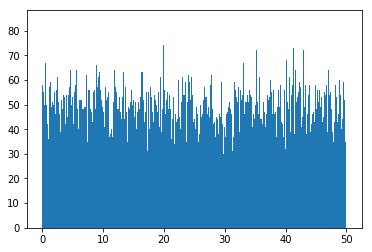

In [8]:
plt.hist(tada, bins = 1000)

In [1]:
mylist = []

In [4]:
import numpy as np


(2,)

In [6]:
mylist.append(np.array([1,1]))

In [7]:
mylist

[array([1, 1]), array([1, 1])]

In [10]:
np.random.uniform(size = 2)

array([0.53072802, 0.27524779])

In [11]:
[0] * 3

[0, 0, 0]

In [12]:
np.array([0]*3)

array([0, 0, 0])

In [9]:
test_list = ['a', 'v', 'w']

In [18]:
test_list.index('a')

0

In [34]:
def adjust_params_for_multiple_subjects(params = ['v', 'a', 'w'], 
                                        params_bounds = [(0,1), (0, 2), (0, 1)], 
                                        params_vary = ['v', 'w'],
                                        n_subjects = 3):
    params_adj = []
    params_bounds_adj = []
    cnt = 0
    for p in params:
        if p in params_vary:
            for i in range(n_subjects):
                params_adj.append(p + '_' + str(i))
                params_bounds_adj.append(params_bounds[cnt])
        else:
            params_adj.append(p)
            params_bounds_adj.append(params_bounds[cnt])
        cnt += 1
    return params_adj, params_bounds_adj

In [35]:
adjust_params_for_multiple_subjects()

(['v_0', 'v_1', 'v_2', 'a', 'w_0', 'w_1', 'w_2'],
 [(0, 1), (0, 1), (0, 1), (0, 2), (0, 1), (0, 1), (0, 1)])

In [45]:
def get_subj_params(params = [0, 1, 2, 3, 4],
                   params_ordered = ['v', 'a', 'w'],
                   param_varies = [0, 0, 1],
                   params_names = ['v', 'a', 'w_0', 'w_1', 'w_2'],
                   subj_idx = 0):
    # Get parameters for current dataset
        n_params = len(params_ordered)
        params_tmp = []
        for j in range(n_params):
            if param_varies[j] == 1:
                params_tmp.append(params[params_names.index(params_ordered[j] + '_' + str(subj_idx))])
            else:
                params_tmp.append(params[params_names.index(params_ordered[j])])
        return params_tmp

In [46]:
get_subj_params()

[0, 1, 2]

In [8]:
cnt = 0
while True:
    cnt += 1
    if cnt > 10:
        print(cnt)
        break

11


In [10]:
def calculate_weights(self):
        out = self.p.starmap(self.target, zip(self.particles, self.data_tile))
        return np.fromiter(out, np.float)

    def sample(self, data, num_particles = 10000, max_iter = 20):
        self.particles = np.zeros((num_particles, self.dims))

        self.data = data
        self.data_tile = np.tile(self.data, (self.particles.shape[0], 1, 1))
        self.p = mp.Pool(mp.cpu_count())

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

In [28]:
data = np.random.uniform(size = (10,5))

In [29]:
particles = np.ones((10, 5))

In [38]:
my_tile = np.tile(data, (particles.shape[0], 1, 1))

In [43]:
for j in zip(particles, my_tile):
    print(j)

(array([1., 1., 1., 1., 1.]), array([[0.57238097, 0.67623494, 0.78288829, 0.67937377, 0.7936706 ],
       [0.30049997, 0.86235713, 0.26035501, 0.57428152, 0.52260716],
       [0.69369302, 0.9290034 , 0.94152368, 0.4315618 , 0.74936872],
       [0.26012553, 0.08012147, 0.10086657, 0.47626701, 0.78529835],
       [0.08812225, 0.4056827 , 0.75775738, 0.32627397, 0.55574205],
       [0.44218858, 0.16884444, 0.97674247, 0.34895098, 0.59240901],
       [0.70592777, 0.50837883, 0.08340832, 0.96430742, 0.35946586],
       [0.83536121, 0.81687745, 0.59137712, 0.56383022, 0.8255326 ],
       [0.05355611, 0.03065841, 0.41643992, 0.53558903, 0.58171467],
       [0.25193875, 0.34300263, 0.23430708, 0.91700736, 0.91331397]]))
(array([1., 1., 1., 1., 1.]), array([[0.57238097, 0.67623494, 0.78288829, 0.67937377, 0.7936706 ],
       [0.30049997, 0.86235713, 0.26035501, 0.57428152, 0.52260716],
       [0.69369302, 0.9290034 , 0.94152368, 0.4315618 , 0.74936872],
       [0.26012553, 0.08012147, 0.1008665

In [44]:
np.random.uniform(0, 1, 3)

array([0.11128695, 0.48407282, 0.82680959])

In [5]:
os.listdir('/media/data_cifs/afengler/data/kde/ornstein/method_comparison/')

['_expanded_bounds__7.pickle',
 '.ipynb_checkpoints',
 '_expanded_bounds__6.pickle',
 '_expanded_bounds__11.pickle',
 '_expanded_bounds__4.pickle',
 '_expanded_bounds__9.pickle',
 '_expanded_bounds__18.pickle',
 '_expanded_bounds__16.pickle',
 '_expanded_bounds__3.pickle',
 '_expanded_bounds__15.pickle',
 '_expanded_bounds__23.pickle',
 '_expanded_bounds__2.pickle',
 '_expanded_bounds__20.pickle',
 '_expanded_bounds__13.pickle',
 '_expanded_bounds__25.pickle',
 'ornstein_uhlenbeck_kde_sim_random.pickle',
 '_expanded_bounds__10.pickle',
 '_expanded_bounds__22.pickle',
 '_expanded_bounds__21.pickle',
 '_expanded_bounds__19.pickle',
 '_expanded_bounds_test__999.pickle',
 '_expanded_bounds__1.pickle',
 '_expanded_bounds__5.pickle',
 '_expanded_bounds__17.pickle',
 '_expanded_bounds__12.pickle',
 '_expanded_bounds__8.pickle',
 '_expanded_bounds__24.pickle',
 '_expanded_bounds__14.pickle']

In [3]:
t = pickle.load(open('/media/data_cifs/afengler/data/kde/ornstein/method_comparison/_expanded_bounds_test__999.pickle', 'rb'))

In [27]:
t[2]

array([[[-0.60803503,  1.15883852,  0.30277242, -0.54329505,
          1.16506866],
        [-0.6251384 ,  1.2038119 ,  0.58977254,  0.25235419,
          0.45398726],
        [ 1.79101753,  1.54192591,  0.40756767,  0.78925179,
          1.47303705],
        ...,
        [-1.63028195,  1.53487474,  0.60488254,  0.94356938,
          1.55713028],
        [ 0.85522472,  1.27985177,  0.7846262 ,  0.71513361,
          0.87410719],
        [ 1.33993638,  1.33371793,  0.58592248, -0.4254879 ,
          0.08377577]],

       [[-0.60803503,  1.15883852,  0.30277242, -0.54329505,
          1.16506866],
        [ 0.31327606,  1.2038119 ,  0.66567155,  0.11059546,
          0.26132258],
        [ 1.79101753,  1.54192591,  0.33020334,  0.86638659,
          1.47303705],
        ...,
        [-1.6352345 ,  1.53487474,  0.6241722 ,  0.94356938,
          1.55713028],
        [-0.03883323,  1.27985177,  0.7846262 ,  0.71513361,
          0.87410719],
        [ 1.33993638,  1.15230349,  0.58592248, 

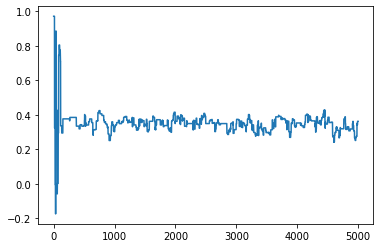

In [21]:
plt.plot(t[2][3,:,0])

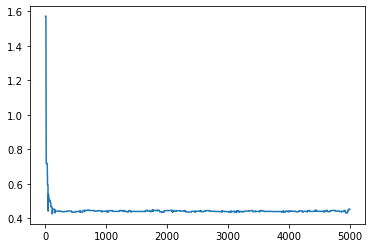

In [20]:
plt.plot(t[2][3,:,1])

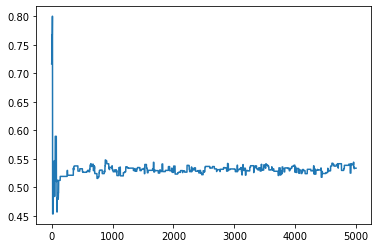

In [19]:
plt.plot(t[2][3,:,2])

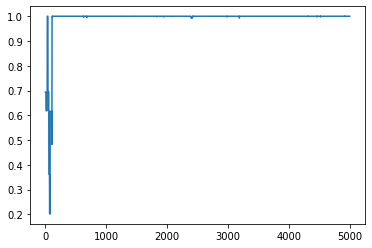

In [18]:
plt.plot(t[2][3,:,3])

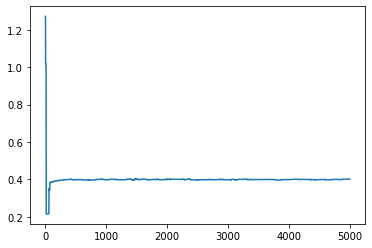

In [14]:
plt.plot(t[2][1,:,4])

(array([1.9500e+02, 1.1200e+02, 4.3000e+01, 2.4000e+01, 2.0000e+00,
        5.0000e+00, 3.4000e+01, 3.1000e+01, 3.7000e+01, 5.7000e+01,
        5.4000e+01, 6.8000e+01, 1.6000e+01, 3.3000e+01, 4.9000e+01,
        9.0000e+01, 8.9000e+01, 2.5700e+02, 2.7900e+02, 4.9300e+04,
        4.8562e+04, 3.5000e+01, 6.7000e+01, 4.0000e+00, 1.7000e+01,
        7.0000e+00, 1.2000e+01, 6.0000e+00, 8.0000e+00, 1.4000e+01,
        1.0000e+00, 5.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
        2.0000e+01, 3.0000e+00, 5.7000e+01, 1.3000e+01, 4.6000e+01,
        0.0000e+00, 0.0000e+00, 1.2000e+01, 4.0000e+00, 0.0000e+00,
        4.0000e+00, 5.0000e+00, 1.6000e+01, 4.0000e+00, 9.0000e+00,
        1.0000e+01, 1.5000e+01, 8.0000e+00, 3.0000e+00, 1.3000e+01,
        1.6000e+01, 1.0000e+00, 5.0000e+00, 1.1000e+01, 3.0000e+00,
        1.6000e+01, 4.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+01,
        7.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 8.0000e+00,
        6.0000e+00, 0.0000e+00, 3.0000e+00, 0.00

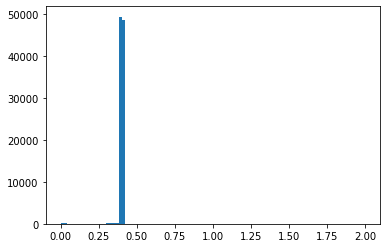

In [12]:
plt.hist(np.reshape(t[2][:,:,4], (-1)), bins = 100)

In [4]:
np.reshape(t[2][:,:,3], (-1)).shape

(100000,)

In [30]:
test = np.reshape(t[2][2000:3999, 3:18, :],newshape = (-1, 5))

In [17]:
np.mean(t[2][:, :, :], axis = 1)

array([[ 0.26585883,  0.49002238,  0.54051205, -0.7072323 ,  0.39883825],
       [ 0.25563692,  0.48685861,  0.54325216, -0.71065534,  0.39872636],
       [ 0.25624101,  0.48922619,  0.5425784 , -0.72128814,  0.40046545],
       [ 0.35292722,  0.44575428,  0.53115565,  0.99130355,  0.40368201],
       [ 0.27222596,  0.49309157,  0.54191142, -0.72652175,  0.39652496],
       [ 0.25566393,  0.48324216,  0.54414272, -0.70598152,  0.40248493],
       [ 0.34829359,  0.44395068,  0.53102762,  0.9734636 ,  0.4052844 ],
       [ 0.24782184,  0.48136249,  0.54513677, -0.6823409 ,  0.39950618],
       [ 0.24986   ,  0.44528783,  0.51022719,  0.91831832,  0.44097718],
       [ 0.27126892,  0.4831012 ,  0.54222726, -0.69867466,  0.39861212],
       [ 0.25962883,  0.4812597 ,  0.54577979, -0.69791552,  0.40456312],
       [ 0.25516733,  0.49075977,  0.54282699, -0.7099814 ,  0.39739531],
       [ 0.31593762,  0.44187367,  0.5287673 ,  0.97247086,  0.40928883],
       [ 0.3443579 ,  0.44038034,  0.5

In [31]:
pd.DataFrame(t[2][4, :, :]).corr()

,0,1,2,3,4
0,1.000000,0.055932,-0.930726,-0.312491,-0.276649
1,0.055932,1.000000,0.026616,0.587780,-0.183619
2,-0.930726,0.026616,1.000000,0.306837,0.279118
3,-0.312491,0.587780,0.306837,1.000000,-0.240376
4,-0.276649,-0.183619,0.279118,-0.240376,1.000000


In [6]:
def get_W(chains):
    return np.sum(np.square((chains - np.mean(chains, axis = 1, keepdims = 1))), axis = (0, 1)) / (chains.shape[0] * (chains.shape[1] - 1))
    
def get_B_div_n(chains):
    return np.sum(np.square(np.mean(chains, axis = 1, keepdims = 1) - np.mean(chains, axis = (0,1), keepdims = 1)), axis = (0, 1)) / (chains.shape[0] - 1)
    
def get_gelman_rubin_univ(chains, 
                          burn_in = 1000):
    W = get_W(chains[:, burn_in:, :])
    B_div_n = get_B_div_n(chains[:, burn_in:, :])
    V = (chains[:, burn_in:, :].shape[1] - 1) / chains[:, burn_in:, :].shape[1] * W + B_div_n 
    R_hat = V / W
    return R_hat

In [15]:
diag_.get_geweke_diags(t[2])

(1, array([1.79437426, 1.36001188, 0.67764767, 0.84421776, 0.56581082,
        1.18285617, 0.51745841, 1.32641342, 0.40502762, 1.4969179 ,
        1.24534516, 3.15681877, 0.6866149 , 3.20286059, 1.82947968,
        0.00589037, 0.97838106, 0.2557124 , 0.65831706, 1.78929032,
        1.43815587, 0.61327277, 0.67826246, 1.19823853, 0.1226644 ,
        0.20139363, 0.28005795, 0.07889789, 0.16804288, 0.78626334,
        0.39583814, 0.41345633, 0.39742325, 0.43416393, 0.59222402,
        0.20662212, 2.90561335, 1.02732611, 0.98196504, 1.6029301 ,
        0.31860208, 0.99339989, 0.80603878, 0.79803325, 1.13395908,
        0.18803923, 1.5223989 , 0.74340093, 1.05055816, 1.5617504 ,
        1.04345653, 0.2240382 , 0.89197146, 0.31890123, 1.34206853,
        1.62273797, 1.17842707, 1.47907629, 0.03148971, 0.12764727,
        0.84355897, 0.12769152, 0.85494222, 0.59178994, 0.92604072,
        1.28909643, 1.6745565 , 1.22874216, 0.28756638, 0.8458726 ,
        0.97321975, 2.7152594 , 1.75253391, 2

In [4]:
t_swapped = np.swapaxes(t[2],0, 1)

In [5]:
t_swapped.shape
t_swapped = t_swapped[3:18, :, :]

In [35]:
#(t_swapped[:,1,:] 
W = np.sum(np.square((t_swapped - np.mean(t_swapped, axis = 1, keepdims = 1))), axis = (0, 1)) / (t_swapped.shape[0] * (t_swapped.shape[1] - 1))

In [36]:
B_div_n = np.sum(np.square(np.mean(t_swapped, axis = 1, keepdims = 1) - np.mean(t_swapped, axis = (0,1), keepdims = 1)), axis = (0, 1)) / (t_swapped.shape[0] - 1)

In [37]:
V = (t_swapped.shape[1] - 1) / (t_swapped.shape[1]) * W + B_div_n

In [38]:
V / W

array([1.06130532, 1.02016818, 1.04186833, 1.05915103, 1.03040361])

In [127]:
B / t_swapped.shape[1]

array([1.67361155e-06, 8.67288567e-08, 1.33998623e-08, 9.48741919e-05,
       4.50000222e-08])

In [95]:
W

array([0.04295023, 0.00741185, 0.00091622, 0.02183918, 0.00543918])

In [97]:
B

array([6.69444620e-03, 3.46915427e-04, 5.35994493e-05, 3.79496768e-01,
       1.80000089e-04])

In [99]:
V

array([0.04294117, 0.00741008, 0.000916  , 0.0219286 , 0.00543786])

In [ ]:
np.cov()

In [40]:
t_swapped.shape

(15, 3500, 5)

In [11]:
def get_W_mv(chains):
    tmp = np.zeros((chains.shape[2], chains.shape[2]))
    for i in range(chains.shape[0]):
        tmp += np.cov(chains[i].T)
    return tmp / chains.shape[0]

In [12]:
W_mv = get_W_mv(chains = t_swapped)

In [13]:
def get_B_div_n_mv(chains):
    phi_dot = np.mean(chains, axis = 1)
    #phi_dot_dot = np.mean(phi_dot, axis = 0)
    return np.cov(phi_dot.T) / chains.shape[0]  

In [18]:
def get_gel_rub_mv(chains):
    W = get_W_mv(chains)
    B_div_n = get_B_div_n_mv(chains)
    W_inv = np.linalg.inv(W)
    lambda_1 = np.sort(np.linalg.eigvals(np.dot(W_inv, B_div_n)))[-1]
    print(np.sort(np.linalg.eigvals(np.dot(W_inv, B_div_n))))
    print(lambda_1)
    R_hat = (chains.shape[1] - 1) / chains.shape[1] + ((chains.shape[0] + 1) / chains.shape[0]) * lambda_1
    return R_hat

In [19]:
get_gel_rub_mv(t_swapped)

[0.00014434 0.00057147 0.00163968 0.00229057 0.00893636]
0.008936359880899393


1.0092821172062927

In [ ]:
def compute_geweke():

In [8]:
import pycuda.driver as drv
drv.init()
print('Detected {} CUDA Capable device(s)'.format(drv.Device.count()))

for i in range(drv.Device.count()):
     gpu_device = drv.Device(i)
     print('Device {}: {}'.format( i, gpu_device.name() ))
     compute_capability = float( '%d.%d' % gpu_device.compute_capability() )
     print('\t Compute Capability: {}'.format(compute_capability))
     print('\t Total Memory: {} megabytes'.format(gpu_device.total_memory()//(1024**2)))

Device 0: GeForce GTX TITAN X
	 Compute Capability: 5.2
	 Total Memory: 12212 megabytes
Device 1: GeForce GTX TITAN X
	 Compute Capability: 5.2
	 Total Memory: 12212 megabytes
Device 2: GeForce GTX TITAN X
	 Compute Capability: 5.2
	 Total Memory: 12212 megabytes
Device 3: GeForce GTX 670
	 Compute Capability: 3.0
	 Total Memory: 1999 megabytes


In [14]:
device_attributes_tuples = gpu_device.get_attributes().items()
device_attributes = {}
    
for k, v in device_attributes_tuples:
    device_attributes[str(k)] = v

In [15]:
gpu_device.get_attributes().items()
num_mp = device_attributes['MULTIPROCESSOR_COUNT']

In [16]:
num_mp

7

In [17]:
compute_capability

3.0

In [18]:
cuda_cores_per_mp = {3.0: 16, 5.0 : 128, 5.1 : 128, 5.2 : 128, 6.0 : 64, 6.1 : 128, 6.2 : 128}[compute_capability]

In [19]:
cuda_cores_per_mp

16

In [20]:
print('\t ({}) Multiprocessors, ({}) CUDA Cores / Multiprocessor: {} CUDA Cores'.format(num_mp, cuda_cores_per_mp, num_mp * cuda_cores_per_mp))
 

	 (7) Multiprocessors, (16) CUDA Cores / Multiprocessor: 112 CUDA Cores


In [22]:
device_attributes.pop('MULTIPROCESSOR_COUNT')
for k in device_attributes.keys():
    print('\t {}: {}'.format(k, device_attributes[k]))

	 ASYNC_ENGINE_COUNT: 1
	 CAN_MAP_HOST_MEMORY: 1
	 CLOCK_RATE: 980000
	 COMPUTE_CAPABILITY_MAJOR: 3
	 COMPUTE_CAPABILITY_MINOR: 0
	 COMPUTE_MODE: DEFAULT
	 CONCURRENT_KERNELS: 1
	 ECC_ENABLED: 0
	 GLOBAL_L1_CACHE_SUPPORTED: 0
	 GLOBAL_MEMORY_BUS_WIDTH: 256
	 GPU_OVERLAP: 1
	 INTEGRATED: 0
	 KERNEL_EXEC_TIMEOUT: 1
	 L2_CACHE_SIZE: 524288
	 LOCAL_L1_CACHE_SUPPORTED: 1
	 MANAGED_MEMORY: 1
	 MAXIMUM_SURFACE1D_LAYERED_LAYERS: 2048
	 MAXIMUM_SURFACE1D_LAYERED_WIDTH: 65536
	 MAXIMUM_SURFACE1D_WIDTH: 65536
	 MAXIMUM_SURFACE2D_HEIGHT: 32768
	 MAXIMUM_SURFACE2D_LAYERED_HEIGHT: 32768
	 MAXIMUM_SURFACE2D_LAYERED_LAYERS: 2048
	 MAXIMUM_SURFACE2D_LAYERED_WIDTH: 65536
	 MAXIMUM_SURFACE2D_WIDTH: 65536
	 MAXIMUM_SURFACE3D_DEPTH: 2048
	 MAXIMUM_SURFACE3D_HEIGHT: 32768
	 MAXIMUM_SURFACE3D_WIDTH: 65536
	 MAXIMUM_SURFACECUBEMAP_LAYERED_LAYERS: 2046
	 MAXIMUM_SURFACECUBEMAP_LAYERED_WIDTH: 32768
	 MAXIMUM_SURFACECUBEMAP_WIDTH: 32768
	 MAXIMUM_TEXTURE1D_LAYERED_LAYERS: 2048
	 MAXIMUM_TEXTURE1D_LAYERED_WIDTH: 

In [37]:
import numpy as numpy
import pycuda.autoinit
from pycuda import gpuarray
from time import time
from pycuda.elementwise import ElementwiseKernel
host_data = np.float32( np.random.random(50000000) )
gpu_2x_ker = ElementwiseKernel("float *in, float *out",
                               "out[i] = 2 * in[i];",
                               "gpu_2x_ker")

In [42]:
def speedcomparison():
    t1 = time()
    host_data_2x = host_data * np.float32(2)
    t2 = time()
    print('total time to compute on CPU:', (t2 - t1))
    device_data = gpuarray.to_gpu(host_data)
    device_data_2x = gpuarray.empty_like(device_data)
    t1 = time()
    gpu_2x_ker(device_data, device_data_2x)
    t2 = time()
    
    from_device  = device_data_2x.get()
    
    print('total time to compute on GPU:', (t2 - t1))
    print(np.allclose(from_device, host_data_2x))

In [46]:
speedcomparison()

total time to compute on CPU: 0.17718839645385742
total time to compute on GPU: 0.00014066696166992188
True


In [22]:
acf(t_swapped[0, :, :])

/home/afengler/miniconda3/envs/pytorch/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


ValueError: x is required to have ndim 1 but has ndim 2

In [40]:
t_swapped.shape[1] / (1 + 2 * np.sum(acf(t_swapped[0, 500:, 0], nlags = 200)))

42.29423329027796

In [41]:
acf_vals = acf(t_swapped[0, 1000:, 0], nlags = 200)



In [58]:
len(np.argwhere(acf_vals < -.01))

10

In [21]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

In [15]:
mod = AutoReg(t_swapped[0, :, 2].T, 100)
res = mod.fit()

In [28]:
sel = ar_select_order(t_swapped[0, :, 1],maxlag = 10, seasonal = False)
sel.ar_lags
res = sel.model.fit()

AttributeError: 'AutoRegResults' object has no attribute 'sd'

In [60]:
np.random.normal(loc = 0 , scale = [0.1, 1, 20], size = 3)

array([ 0.38502249, -1.35027308, -8.09199891])

In [63]:
np.array([0, 1, 2]).shape

(3,)

In [29]:
res.__dict__.keys()

dict_keys(['_results', '__doc__'])

In [34]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 3500
Model:                     AutoReg(1)   Log Likelihood               21380.195
Method:               Conditional MLE   S.D. of innovations              0.001
Date:                Mon, 27 Jan 2020   AIC                            -15.057
Time:                        18:34:02   BIC                            -15.052
Sample:                             1   HQIC                           -15.055
                                 3500                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0078      0.001      5.318      0.000       0.005       0.011
y.L1           0.9838      0.003    322.906      0.000       0.978       0.990
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0165           +0.0000j            1.0165            0.0000
-----------------------------------------------------------------------------
"""

In [51]:
res.params

array([0.00781153, 0.98379882])

In [52]:
res.sigma2

2.8848486721030227e-07

In [55]:
#res.sigma2 / np.square(1 - np.sum(res.params[1:]))

0.0010990816295487348

In [198]:
def get_geweke_diags(chains, 
                     split = 0.3, 
                     skip = 0.5):
    
    """Function computes geweke statistic for markov chains"""
    # Check dimensionality of chains
    # If single chain add dimesion
    n_dims = len(chains.shape)
    if n_dims == 2:
        chains = np.expand_dims(chains, axis = 0)

    # Compute split demarcations as integers to be used for indexing
    n_floor = int(chains.shape[1] * (split + skip))
    n_skip = int(chains.shape[1] * (skip))
    
    # Initialize the vector in which we store z-scores
    z_scores = np.zeros(chains.shape[0] * chains.shape[2])
    
    # Main loop that computes statistics of interest
    for i in range(chains.shape[0]):
        for j in range(chains.shape[2]):
            # Get Autoregression coefficients for each part of split of chain
            sel_1 = ar_select_order(chains[i, n_skip:n_floor, j], maxlag = 10, seasonal = False)
            sel_2 = ar_select_order(chains[i, n_floor:, j], maxlag = 10, seasonal = False)
            res_1 = sel_1.model.fit()
            res_2 = sel_2.model.fit()
            
            # Compute the Autoregression corrected respective standard deviations
            s_1 = res_1.sigma2 / np.square(1 - np.sum(res_1.params[1:]))
            s_2 = res_2.sigma2 / np.square(1 - np.sum(res_2.params[1:]))
            
            # Compute (absolute) z scores that form the basis of the test of whether or not to continue sampling
            z_scores[i * chains.shape[2] + j] = np.abs((np.mean(chains[i, n_skip:n_floor, j]) - np.mean(chains[i, n_floor:, j])) / np.sqrt((1 / (n_floor - n_skip)) * s_1  + (1 / (chains.shape[1] - n_floor)) * s_2))
    
    # Continuation check: All absolute z scores below 2? If yes stop sampling
    continue_ = int((np.sum(z_scores > 2)) > 0)
    return continue_, z_scores

In [196]:
c, z = get_geweke_diags(chains = t_swapped[7, :, :])

(1, 3500, 5)


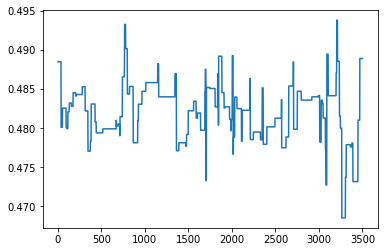

In [110]:
plt.plot(t_swapped[10, :, 1])

In [31]:
X = np.random.uniform(low = -1.0, high = 1.0, size = (10000, 6))
mult_vec = np.random.normal(size = (6, 1))
y = np.matmul(X[:, :], mult_vec)

X = np.float32(X)
y = np.float32(y)

bounds = [(-1.0, 1.0) for i in  range(6)]

In [16]:
def loss_fun(x):
    return np.square(model.predict(np.reshape(x, (1, 6))) - y[0])[0, 0]

In [38]:
model.predict(np.reshape(np.array([-0.48600431,  0.96750214,  0.41143705,  0.3160704 ,  0.1586281 ,
       -0.20384907]), (1, 6)))

array([[1.4986428]], dtype=float32)

In [ ]:
model(np.reshape(np.array([-0.17751179,  0.32534568, -0.12299329,  0.51399916, -0.12694001,
        0.50496293])

In [30]:
model = keras.Sequential()
model.add(keras.layers.Dense(units = 256, 
                             activation = 'tanh', 
                             input_dim = 6))
model.add(keras.layers.Reshape([16, 16, 1]))
model.add(keras.layers.Conv2D(filters = 32, 
                              kernel_size = (9, 9), 
                              strides = 1, 
                              padding = 'valid',
                              activation= 'tanh',
                              data_format = 'channels_last'
                              ))
# model.add(keras.layers.MaxPool2D(pool_size = (2, 2)))
model.add(keras.layers.Conv2D(filters = 64,
                              kernel_size = (6, 6),
                              strides = 2,
                              padding = 'valid',
                              activation='tanh',
                              data_format = 'channels_last'))

# model.add(keras.layers.Conv2D(filters = 64, 
#                               kernel_size = (4, 4), 
#                               strides = 2, 
#                               padding = 'valid',
#                               activation= 'tanh',
#                               data_format = 'channels_last'
#                               ))

#model.add(keras.layers.Flatten())
# model.add(keras.layers.Reshape([128, 1]))
# model.add(keras.layers.Conv1D(filters = 64,
#                               kernel_size = 16,
#                               strides = 1,
#                               padding = 'valid',
#                               activation = 'tanh',
#                               data_format = 'channels_last'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units = 1, activation = None))
model.compile(loss = tf.losses.mse,
              optimizer = "adam")

In [32]:
now = time.time()
out = model.fit(X, y, validation_split = 0.1, epochs = 50, batch_size = 1000, shuffle = True, verbose = 1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 1s 121us/sample - loss: 0.6287 - val_loss: 0.0767
Epoch 2/50
9000/9000 [==============================] - 0s 44us/sample - loss: 0.1135 - val_loss: 0.0298
Epoch 3/50
9000/9000 [==============================] - 0s 47us/sample - loss: 0.0287 - val_loss: 0.0341
Epoch 4/50
9000/9000 [==============================] - 0s 47us/sample - loss: 0.0172 - val_loss: 0.0029
Epoch 5/50
9000/9000 [==============================] - 0s 46us/sample - loss: 0.0067 - val_loss: 0.0030
Epoch 6/50
9000/9000 [==============================] - 0s 42us/sample - loss: 0.0016 - val_loss: 0.0028
Epoch 7/50
9000/9000 [==============================] - 0s 44us/sample - loss: 0.0011 - val_loss: 5.9324e-04
Epoch 8/50
9000/9000 [==============================] - 0s 45us/sample - loss: 5.8259e-04 - val_loss: 1.8298e-04
Epoch 9/50
9000/9000 [==============================] - 0s 44us/sample - loss: 2.2713e-04 - val_los

In [4]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(units = 100, 
                             activation = 'tanh', 
                             input_dim = 6))
model2.add(keras.layers.Dense(units = 100,
                             activation = 'tanh'))
model2.add(keras.layers.Dense(units = 120,
                             activation = 'tanh'))
model2.add(keras.layers.Dense(units = 1, activation = None))
model2.compile(loss = tf.losses.mse, optimizer = "adam")

In [5]:
now = time.time()
out2 = model2.fit(X, y, validation_split = 0.1, epochs = 50, batch_size = 1000, shuffle = True, verbose = 1) 
print(time.time() - now)

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 0s 46us/sample - loss: 0.6848 - val_loss: 0.0294
Epoch 2/50
9000/9000 [==============================] - 0s 3us/sample - loss: 0.1008 - val_loss: 0.0404
Epoch 3/50
9000/9000 [==============================] - 0s 3us/sample - loss: 0.0282 - val_loss: 0.0345
Epoch 4/50
9000/9000 [==============================] - 0s 3us/sample - loss: 0.0191 - val_loss: 0.0082
Epoch 5/50
9000/9000 [==============================] - 0s 3us/sample - loss: 0.0092 - val_loss: 0.0054
Epoch 6/50
9000/9000 [==============================] - 0s 3us/sample - loss: 0.0050 - val_loss: 0.0040
Epoch 7/50
9000/9000 [==============================] - 0s 3us/sample - loss: 0.0038 - val_loss: 0.0033
Epoch 8/50
9000/9000 [==============================] - 0s 3us/sample - loss: 0.0032 - val_loss: 0.0027
Epoch 9/50
9000/9000 [==============================] - 0s 3us/sample - loss: 0.0029 - val_loss: 0.0025
Epoch 10/50
900

In [10]:
out = model.fit(X, y, validation_split = 0.1, epochs = 2, batch_size = 1000, shuffle = True, verbose = 1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/2
9000/9000 [==============================] - 1s 63us/sample - loss: 6.1040e-04 - val_loss: 5.5717e-04
Epoch 2/2
9000/9000 [==============================] - 0s 52us/sample - loss: 6.0650e-04 - val_loss: 5.5302e-04


In [245]:
model.summary()

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 256)               1792      
_________________________________________________________________
reshape_49 (Reshape)         (None, 16, 16, 1)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 8, 8, 32)          2624      
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 2, 2, 64)          73792     
_________________________________________________________________
flatten_66 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 257       
Total params: 78,465
Trainable params: 78,465
Non-trainable params: 0
_________________________________________________

In [56]:
model.layers[0].weights[1].

AttributeError: 'ResourceVariable' object has no attribute 'to_numpy'

In [143]:
weights = []
for layer in model.layers:
    weights.append(layer.get_weights())

In [157]:
weights[3][0].shape

(6, 1, 128)

In [70]:
x = tf.make_ndarray(model.layers[5].weights[0])

AttributeError: 'ResourceVariable' object has no attribute 'tensor_shape'

In [84]:
model.layers[5].get_weights()

array([-0.00140154], dtype=float32)

In [129]:
for layer in model.layers:
    print(layer.input_shape)

AttributeError: The layer has never been called and thus has no defined input shape.

In [77]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           multiple                  896       
_________________________________________________________________
conv1d_21 (Conv1D)           multiple                  769       
_________________________________________________________________
flatten_10 (Flatten)         multiple                  0         
_________________________________________________________________
dense_10 (Dense)             multiple                  4         
Total params: 1,669
Trainable params: 1,669
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Concatenate
from tensorflow.keras import Model
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
#         self.Dense = Conv2D(4, 4, strides= (2, 2), padding = "same", activation = 'relu')
#         self.conv2 = Conv2D(4, 2, strides= (2, 2), padding = "same", activation = 'relu')
#         self.pool1 = MaxPool2D((2,2))
#         self.flatten1 = Flatten()
        self.dense0 = Dense(100, activation = 'tanh', input_shape = (6,))
        self.dense1 = Dense(100, activation = 'tanh')
        self.dense2 = Dense(1, activation = None)
#         self.dense1 = Dense(1, activation = 'relu')
#         self.dense2 = Dense(50, activation = 'relu')
#         self.dense3 = Dense(10, activation = 'softmax')
#         self.concat = Concatenate()

    #self.conv2 = Conv2D(7, 2, strides = (1, 1), padding = "same", activation = 'relu')
    #self.pool1 = MaxPool2D((2, 2))
    def call(self, x):
        x = self.dense0(x)
        x = self.dense1(x)
        x = self.dense1(x)
        x = self.dense2(x)
#         z = self.dense1(x)
#         y = self.dense2(x)
#         concat = self.concat([z, y])
#         out = self.dense3(concat)
        return x

In [7]:
model = MyModel()
loss_object = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name = 'train_loss')
test_loss = tf.keras.metrics.Mean(name = 'test_loss')
train_accuracy = tf.keras.metrics.MeanSquaredError(name = 'train_accuracy')
test_accuracy = tf.keras.metrics.MeanSquaredError(name = 'test_accuracy')

In [8]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_object(labels, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    train_loss(loss)
    train_accuracy(labels, predictions)


@tf.function
def eval_step(images, labels):
    predictions = model(images)
    test_accuracy(labels, predictions)
    loss = loss_object(labels, predictions)
    test_loss(loss)

In [9]:
EPOCHS = 50
batch_size = 1000
now = time.time()
for epoch in range(EPOCHS):
    
    for i in range(8):
        train_step(X[i * batch_size:(i+1)*batch_size, :], y[i*batch_size:(i + 1) * batch_size])
        #print('train step completed...')

    for i in range(8, 9, 1):
        eval_step(X[i * batch_size: (i+1)*batch_size, :], y[i*batch_size:(i + 1) * batch_size])

    #model.save_weights('/content', save_format = 'tf')
    print('Epoch: ', str(epoch + 1), 'Train Loss: ', str(train_loss.result().numpy()), 'Train Accuracy: ', str(train_accuracy.result().numpy() * 100))
    print('Epoch: ', str(epoch + 1), 'Eval Loss: ', str(test_loss.result().numpy()), 'Eval Accuracy: ', str(test_accuracy.result().numpy() * 100))


    #train_loss_history.append(train_loss.result().numpy())
    #test_loss_history.append(test_loss.result().numpy())
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

print('Running: ', EPOCHS, ' epochs, ', 9000, ' datapoints, ', batch_size, ' batch size')
print(time.time() - now)

Epoch:  1 Train Loss:  0.76082796 Train Accuracy:  76.08279585838318
Epoch:  1 Eval Loss:  0.064416505 Eval Accuracy:  6.441650539636612
Epoch:  2 Train Loss:  0.06397109 Train Accuracy:  6.397108733654022
Epoch:  2 Eval Loss:  0.13815363 Eval Accuracy:  13.815362751483917
Epoch:  3 Train Loss:  0.07109569 Train Accuracy:  7.109569013118744
Epoch:  3 Eval Loss:  0.0056236545 Eval Accuracy:  0.5623654462397099
Epoch:  4 Train Loss:  0.016405798 Train Accuracy:  1.6405798494815826
Epoch:  4 Eval Loss:  0.02920593 Eval Accuracy:  2.920592948794365
Epoch:  5 Train Loss:  0.017045707 Train Accuracy:  1.7045708373188972
Epoch:  5 Eval Loss:  0.0050159087 Eval Accuracy:  0.5015908740460873
Epoch:  6 Train Loss:  0.0057878476 Train Accuracy:  0.5787847563624382
Epoch:  6 Eval Loss:  0.00773444 Eval Accuracy:  0.7734439801424742
Epoch:  7 Train Loss:  0.0054249526 Train Accuracy:  0.54249526001513
Epoch:  7 Eval Loss:  0.003525819 Eval Accuracy:  0.352581893093884
Epoch:  8 Train Loss:  0.00363

In [10]:
now = time.time()
for i in range(100):
    for j in range(10):
        model(X[(j*1000):((j+1)*1000)])
print((time.time() - now) / 1000)

0.0018636288642883301


In [11]:
model.save_weights('./tmp/tf2_model_test')

In [12]:
model_reloaded = MyModel()

In [13]:
model_reloaded.load_weights('./tmp/tf2_model_test')

In [22]:
now = time.time()
for i in range(100):
    for j in range(10):
        model_reloaded(X[(j * 1000):((j + 1) * 1000)])
print((time.time() - now) / 1000)

0.0021431517601013185


In [15]:
now = time.time()
for i in range(100):
    for j in range(10):
        model_reloaded.predict((X[(j * 1000):((j + 1) * 1000)]))
print((time.time() - now) / 1000)

0.0327267529964447


In [71]:
model_ddm = keras.models.load_model('/Users/afengler/OneDrive/project_nn_likelihoods/data/kde/ddm/keras_models/dnnregressor_ddm_05_03_20_19_58_07/model_final.h5', compile = False)

In [76]:
np.sum(np.core.umath.maximum((model_ddm(np.zeros((1000, 6)))), -1))

-1000.0

In [23]:
now = time.time()
for i in range(100):
    for j in range(10):
        model_reloaded.predict_on_batch(X[(j * 1000):((j + 1) * 1000)])
print((time.time() - now) / 1000)

0.0008058590888977051


In [25]:
now = time.time()
for i in range(100):
    model_reloaded.predict_on_batch(X)
print((time.time() - now) / 100)

0.004635860919952392


In [85]:
t = ()

In [87]:
t

((1, 2),)

In [89]:
2 / (4 / 4)


2.0

In [41]:
np.log2(32)


5.0

In [45]:
np.zeros((1000, 1))[np.invert(np.random.choice([True, False], size = 1000)),:].shape

(511, 1)

In [49]:
a = np.random.choice([True, False], size = 1000)

In [50]:
a

array([False,  True, False, False, False, False, False, False,  True,
        True,  True, False,  True, False, False,  True,  True, False,
        True, False, False,  True,  True, False,  True,  True, False,
       False, False,  True, False,  True,  True,  True, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False,  True,  True, False, False,  True, False, False,  True,
       False, False, False, False, False,  True,  True,  True, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
        True,  True, False,  True,  True, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False,  True,  True, False,  True,
        True, False,

In [51]:
np.invert(a)

array([ True, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True,  True, False, False,  True,
       False,  True,  True, False, False,  True, False, False,  True,
        True,  True, False,  True, False, False, False,  True, False,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
        True, False, False,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True, False, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False, False, False,  True, False, False,  True,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True, False, False, False, False, False,  True,
        True,  True,  True, False,  True, False, False,  True, False,
       False,  True,

In [87]:
np.arange(0, 10, 10).shape[0]

1

In [ ]:
len('post_samp_data_